In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/supply_chain_data.csv')
df.shape

(100, 24)

In [3]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

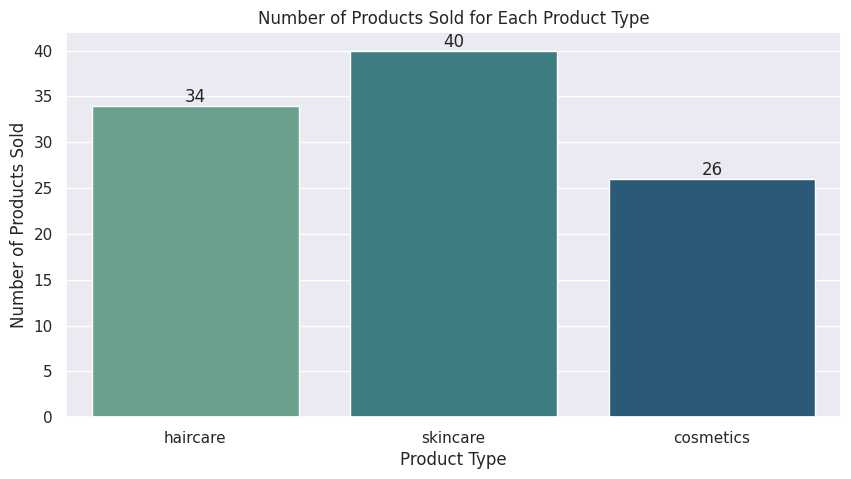

In [16]:
plt.figure(figsize=(10, 5))
sns.set_theme()

ax = sns.countplot(x='Product type', data=df, palette='crest')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Products Sold for Each Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Products Sold')
plt.show()

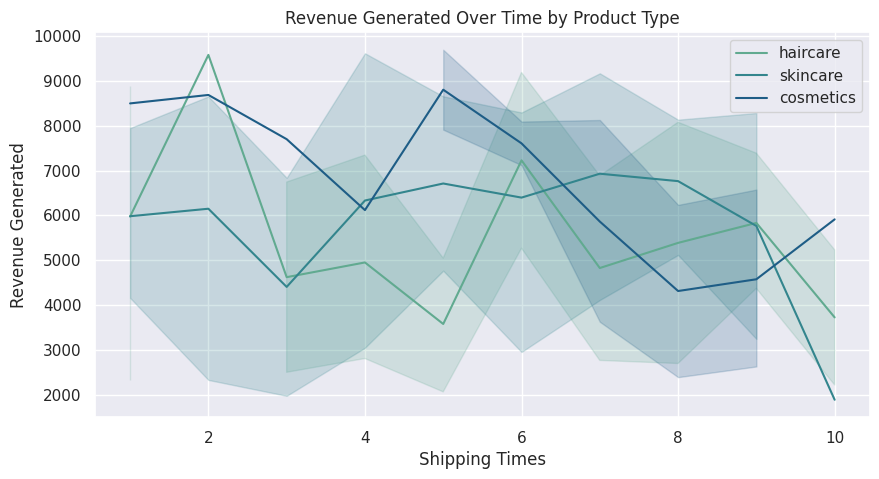

In [20]:
plt.figure(figsize=(10, 5))
sns.set_theme()

sns.lineplot(x='Shipping times', y='Revenue generated', hue='Product type', data=df, palette='crest')
plt.title('Revenue Generated Over Time by Product Type')
plt.xlabel('Shipping Times')
plt.ylabel('Revenue Generated')
plt.legend()
plt.show()

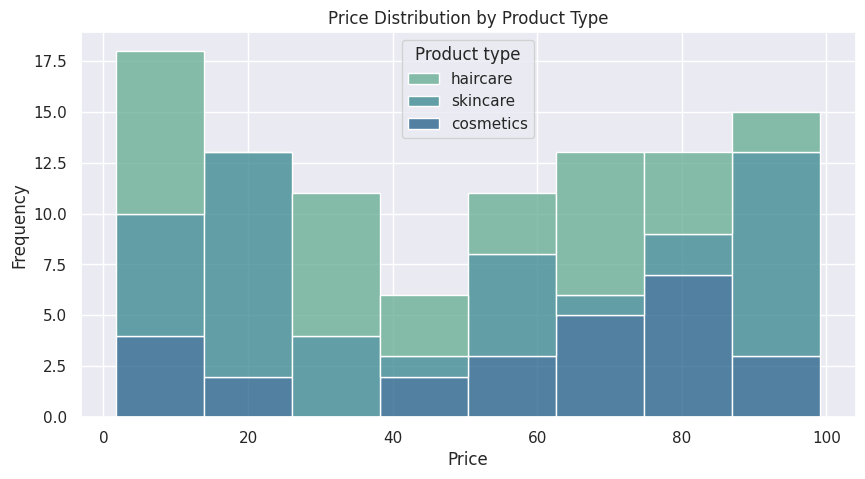

In [21]:
plt.figure(figsize=(10, 5))
sns.set_theme()

sns.histplot(data=df, x='Price', hue='Product type', multiple="stack", palette='crest')
plt.title('Price Distribution by Product Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

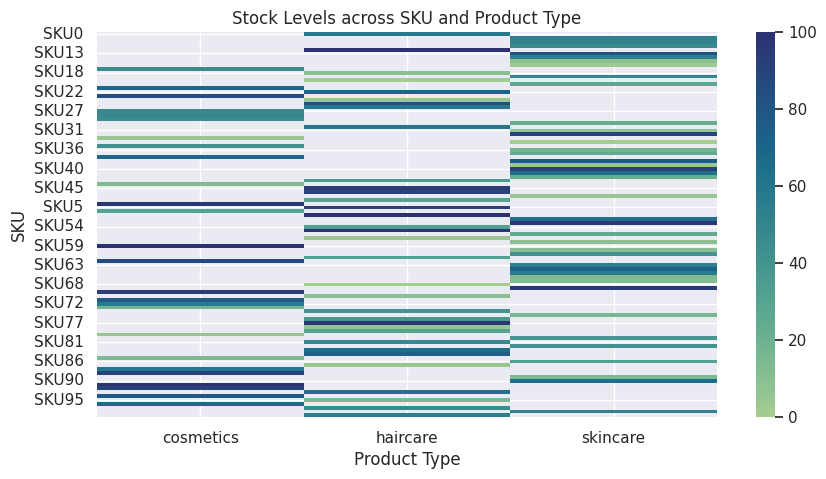

In [49]:
plt.figure(figsize=(10, 5))
sns.set_theme()

sns.heatmap(df.pivot_table(index='SKU', columns='Product type', values='Stock levels', aggfunc='sum'), cmap='crest')
plt.title('Stock Levels across SKU and Product Type')
plt.xlabel('Product Type')
plt.ylabel('SKU')
plt.show()

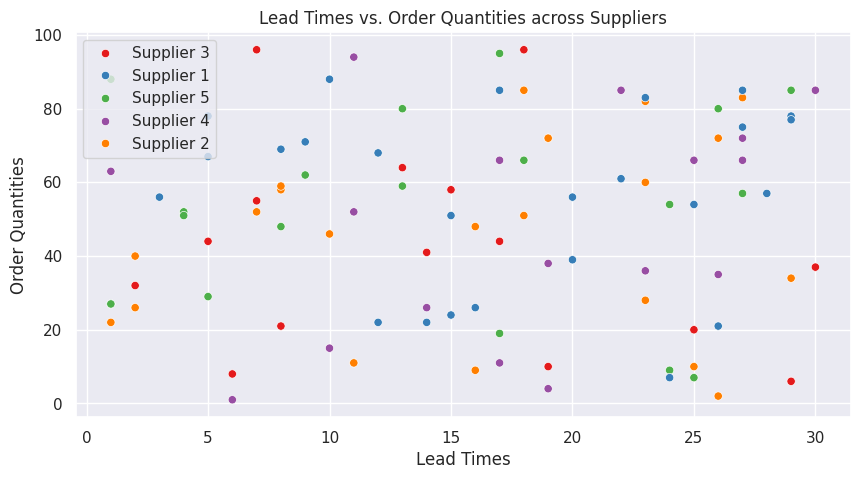

In [47]:
plt.figure(figsize=(10, 5))
sns.set_theme()

sns.scatterplot(x='Lead times', y='Order quantities', hue='Supplier name', data=df, palette='Set1')
plt.title('Lead Times vs. Order Quantities across Suppliers')
plt.xlabel('Lead Times')
plt.ylabel('Order Quantities')
plt.legend()
plt.show()

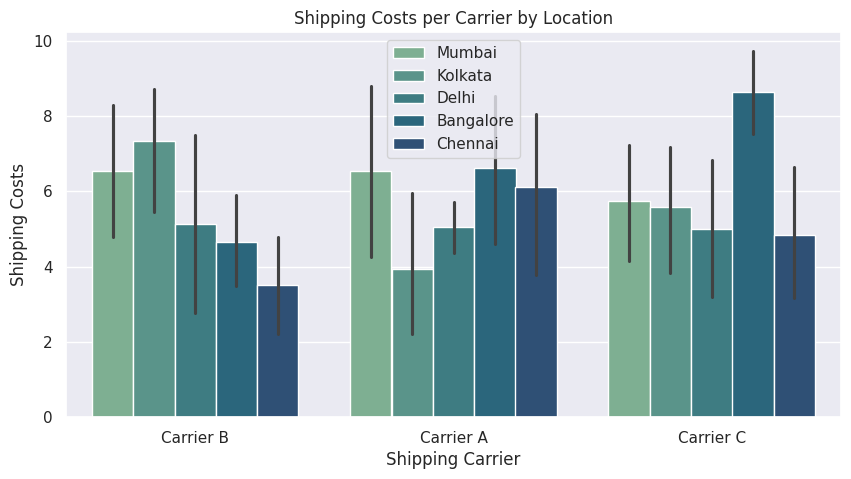

In [50]:
plt.figure(figsize=(10, 5))
sns.set_theme()

sns.barplot(x='Shipping carriers', y='Shipping costs', hue='Location', data=df, palette='crest')
plt.title('Shipping Costs per Carrier by Location')
plt.xlabel('Shipping Carrier')
plt.ylabel('Shipping Costs')
plt.legend()
plt.show()

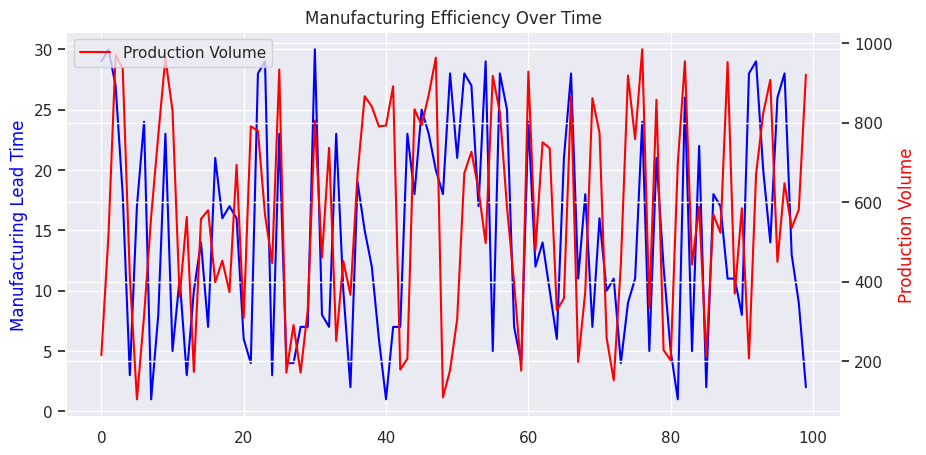

In [55]:
plt.figure(figsize=(10, 5))
sns.set_theme()

plt.plot(df['Manufacturing lead time'], label='Manufacturing Lead Time', color='blue')
plt.ylabel('Manufacturing Lead Time', color='blue')

plt.twinx()
plt.plot(df['Production volumes'], label='Production Volume', color='red')
plt.ylabel('Production Volume', color='red')

plt.title('Manufacturing Efficiency Over Time')
plt.legend(loc='upper left')
plt.show()

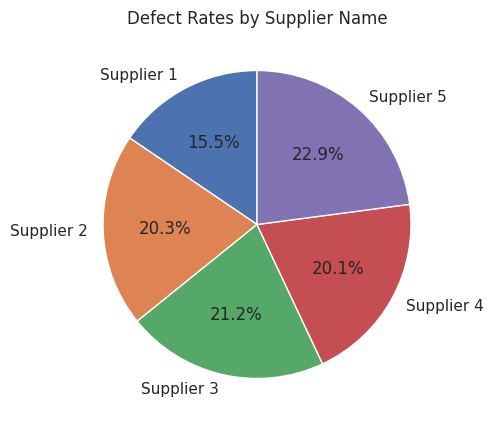

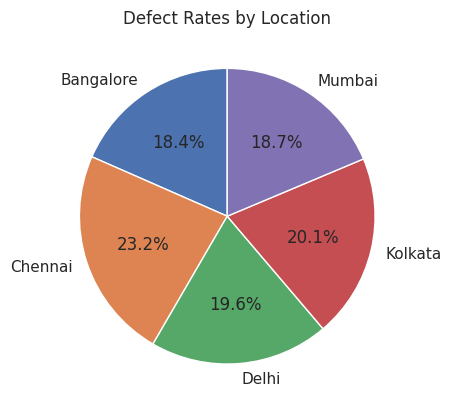

In [73]:
plt.figure(figsize=(5, 5))

supplier_defect_rates = df.groupby('Supplier name')['Defect rates'].mean().reset_index()
plt.pie(supplier_defect_rates['Defect rates'], labels=supplier_defect_rates['Supplier name'], autopct='%1.1f%%', startangle=90)
plt.title('Defect Rates by Supplier Name')
plt.show()

supplier_defect_rates = df.groupby('Location')['Defect rates'].mean().reset_index()
plt.pie(supplier_defect_rates['Defect rates'], labels=supplier_defect_rates['Location'], autopct='%1.1f%%', startangle=90)
plt.title('Defect Rates by Location')
plt.show()

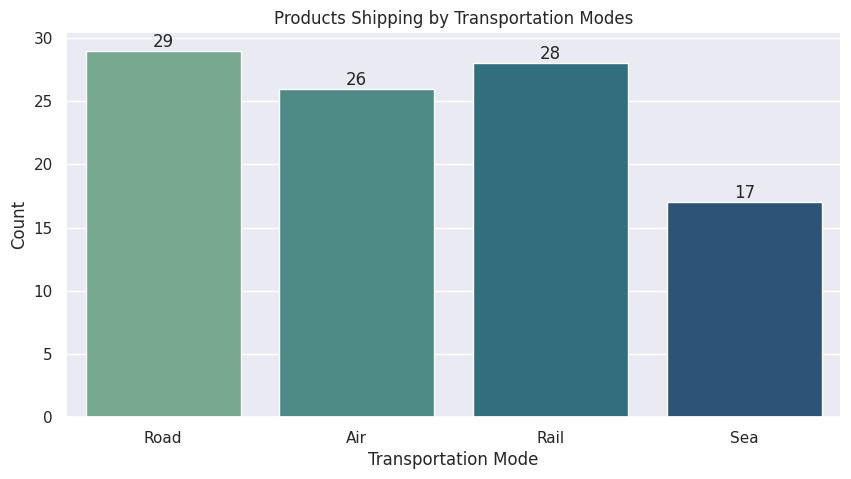

In [77]:
plt.figure(figsize=(10, 5))
sns.set_theme()

ax = sns.countplot(data=df, x='Transportation modes', palette='crest')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.title('Products Shipping by Transportation Modes')
plt.show()

In [78]:
import plotly.express as px

fig = px.treemap(df, path=['Customer demographics'], values='Revenue generated',
                  color='Revenue generated', hover_data=['Customer demographics'],
                  color_continuous_scale='RdBu')
fig.show()

In [82]:
# Which Product Type generates the highest revenue?
revenue_by_product = df.groupby('Product type')['Revenue generated'].sum()
highest_revenue_product = revenue_by_product.idxmax()
print(f"The product type with the highest revenue is: {highest_revenue_product}")

The product type with the highest revenue is: skincare


In [83]:
# Are there any significant correlations between Lead times and Order quantities?
correlation = df['Lead times'].corr(df['Order quantities'])
print(f"The correlation between Lead times and Order quantities is: {correlation}")

The correlation between Lead times and Order quantities is: 0.10545932302505706


In [90]:
# How do Shipping costs vary by Shipping carrier and Location?
shipping_cost_summary = df.groupby(['Shipping carriers', 'Location'])['Shipping costs'].mean().unstack()
shipping_cost_summary

Location,Bangalore,Chennai,Delhi,Kolkata,Mumbai
Shipping carriers,,,,,
Carrier A,6.610093,6.127420,5.065773,3.950432,6.532714
Carrier B,4.654392,3.501335,5.127122,7.343211,6.549139
Carrier C,8.633770,4.834395,4.989154,5.588158,5.731938


In [88]:
# Which suppliers have the most efficient manufacturing processes based on Manufacturing lead time and Production volumes?

df['Efficiency'] = (df['Production volumes'] / df['Manufacturing lead time'])
supplier_efficiency = df.groupby('Supplier name')['Efficiency'].mean().sort_values(ascending=False)
supplier_efficiency

,Efficiency
Supplier name,
Supplier 4,91.225672
Supplier 3,87.391417
Supplier 1,78.372950
Supplier 2,71.577189
Supplier 5,53.167809


In [89]:
# What demographic group contributes the most to sales?

demographics_revenue = df.groupby('Customer demographics')['Revenue generated'].sum()
highest_revenue_demographic = demographics_revenue.idxmax()
print(f"The demographic group contributing the most to sales is: {highest_revenue_demographic}")

The demographic group contributing the most to sales is: Unknown
